In [1]:
import googlemaps
import time
import os
import requests
import itertools
import copy
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from operator import itemgetter
from mapbox import DirectionsMatrix, Directions
from geojson import Point, Feature
from datetime import timedelta

csv_path = 'Florence.csv'
TRAVEL_NAME = os.path.split(csv_path)[-1].split(".")[0]
edge_path = "{}_edge_list.csv".format(TRAVEL_NAME)
start_point = {"name": "Airbnb: Via del Porcellana", "lat":43.772557, "long":11.247123, "type":'accomodation'}

mapbox_api_key = None

In [2]:
from distance_by_google import GoogleDistance

google_api_key = None
gd = GoogleDistance(google_api_key)

In [3]:
from duration_by_mapbox import MapboxDistance

md = MapboxDistance(mapbox_api_key)

In [4]:
def draw_graph(edge_df, node_df, weight='walking'):
    # Create empty graph
    g = nx.Graph()

    edge_col = edge_df.columns
    node_col = node_df.columns
    # Add edges and edge attributes
    for i, elrow in edge_df.iterrows():
        edge_dict = dict(zip(edge_col, elrow))
        g.add_edge(edge_dict['from'], edge_dict['to'], attr_dict=edge_dict, weight=edge_dict[weight])
    for i, nlrow in node_df.iterrows():
        node_dict = dict(zip(node_col, nlrow))
        g.node[node_dict['index']].update(node_dict)
    return g

In [5]:
from data_preparation import prepare_dataset, add_start_point, generate_edge_dataset

Step 1: Read in dataset with all interested attractions and include accommodation which will act as the starting point

In [6]:
df = prepare_dataset(csv_path)

df = add_start_point(df, start_point)

Step 2: Prepare edge dataset for graph

Step 3: Add additional attributes to each edge: Walking, driving duration for each edge. This will serve as weights to the edges

In [7]:
if os.path.exists(edge_path):
    edge_df = pd.read_csv(edge_path)
else:
    edge_df = generate_edge_dataset(df, edge_path, md)

edge_df.tail()

combi: (0, 1)
updated
2 60
combi: (0, 2)
updated
4 60
combi: (0, 3)
updated
6 60
combi: (0, 4)
updated
8 60
combi: (0, 5)
updated
10 60
combi: (0, 6)
updated
12 60
combi: (0, 7)
updated
14 60
combi: (0, 8)
updated
16 60
combi: (0, 9)
updated
18 60
combi: (0, 10)
updated
20 60
combi: (0, 11)
updated
22 60
combi: (0, 12)
updated
24 60
combi: (0, 13)
updated
26 60
combi: (0, 14)
updated
28 60
combi: (0, 15)
updated
30 60
combi: (0, 16)
updated
32 60
combi: (0, 17)
updated
34 60
combi: (0, 18)
updated
36 60
combi: (0, 19)
updated
38 60
combi: (0, 20)
updated
40 60
combi: (0, 21)
updated
42 60
combi: (0, 22)
updated
44 60
combi: (0, 23)
updated
46 60
combi: (0, -1)
updated
48 60
combi: (1, 0)
48 60
combi: (1, 2)
updated
50 60
combi: (1, 3)
updated
52 60
combi: (1, 4)
updated
54 60
combi: (1, 5)
updated
56 60
combi: (1, 6)
updated
58 60
combi: (1, 7)
updated
60 60
have to wait 52.05882501602173 seconds
combi: (1, 8)
updated
2 60
combi: (1, 9)
updated
4 60
combi: (1, 10)
updated
6 60
combi: (

updated
26 60
combi: (12, 14)
updated
28 60
combi: (12, 15)
updated
30 60
combi: (12, 16)
updated
32 60
combi: (12, 17)
updated
34 60
combi: (12, 18)
updated
36 60
combi: (12, 19)
updated
38 60
combi: (12, 20)
updated
40 60
combi: (12, 21)
updated
42 60
combi: (12, 22)
updated
44 60
combi: (12, 23)
updated
46 60
combi: (12, -1)
updated
48 60
combi: (13, 0)
48 60
combi: (13, 1)
48 60
combi: (13, 2)
48 60
combi: (13, 3)
48 60
combi: (13, 4)
48 60
combi: (13, 5)
48 60
combi: (13, 6)
48 60
combi: (13, 7)
48 60
combi: (13, 8)
48 60
combi: (13, 9)
48 60
combi: (13, 10)
48 60
combi: (13, 11)
48 60
combi: (13, 12)
48 60
combi: (13, 14)
updated
50 60
combi: (13, 15)
updated
52 60
combi: (13, 16)
updated
54 60
combi: (13, 17)
updated
56 60
combi: (13, 18)
updated
58 60
combi: (13, 19)
updated
60 60
have to wait 52.17879605293274 seconds
combi: (13, 20)
updated
2 60
combi: (13, 21)
updated
4 60
combi: (13, 22)
updated
6 60
combi: (13, 23)
updated
8 60
combi: (13, -1)
updated
10 60
combi: (14, 0)


,from,to,from_xy,to_xy,walking,driving,lat,long
595,-1,19,"(11.247123, 43.772557)","(11.255056, 43.773106)",640.4,533.5,43.772557,11.247123
596,-1,20,"(11.247123, 43.772557)","(11.256192, 43.769292)",738.7,784,43.772557,11.247123
597,-1,21,"(11.247123, 43.772557)","(11.251878999999999, 43.777276)",674.8,583.2,43.772557,11.247123
598,-1,22,"(11.247123, 43.772557)","(11.258814, 43.776761)",955.8,863,43.772557,11.247123
599,-1,23,"(11.247123, 43.772557)","(11.264658, 43.77151)",1077.6,817.5,43.772557,11.247123


In [9]:
import time


1536362146.861933

Step 4: remove all edges with walking distance of more than 15 minutes
That is the maximum amount of time we are willing to walk at one point

In [17]:
narrowed_df = edge_df[edge_df['walking']<= 900]

In [18]:
g = draw_graph(narrowed_df, df)

In [19]:
# Preview first 5 edges
print(list(g.edges(data=True))[0:2])

[(0, 1, {'attr_dict': {'index': 13, 'from': 1, 'to': 0, 'from_xy': '11.2564189, 43.771534100000004', 'to_xy': '11.255693199999998, 43.772858299999996', 'walking': 126.0, 'driving': 96.8, 'lat': 11.2564189, 'long': 43.771534100000004}, 'weight': 126.0}), (0, 2, {'attr_dict': {'index': 26, 'from': 2, 'to': 0, 'from_xy': '11.250781, 43.7700828', 'to_xy': '11.255693199999998, 43.772858299999996', 'walking': 467.6, 'driving': 284.2, 'lat': 11.250781, 'long': 43.7700828}, 'weight': 467.6})]


In [20]:
# Preview first 10 nodes
list(g.nodes(data=True))[0:2]

[(0,
  {'index': 0,
   'name': 'Cathedral of Santa Maria del Fiore',
   'lat': 43.772858299999996,
   'long': 11.255693199999998,
   'hours': 1.0}),
 (1,
  {'index': 1,
   'name': 'Chiaroscuro',
   'lat': 43.771534100000004,
   'long': 11.2564189,
   'hours': 0.5})]

In [21]:
# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['long'], -node[1]['lat']) for node in g.nodes(data=True)}

# Preview of node_positions with a bit of hack (there is no head/slice method for dictionaries).
dict(list(node_positions.items())[0:5])

{0: (11.255693199999998, -43.772858299999996),
 1: (11.2564189, -43.771534100000004),
 2: (11.250781, -43.7700828),
 3: (11.2534118, -43.7769185),
 5: (11.2553108, -43.7677856)}

#### Visualise short and long paths

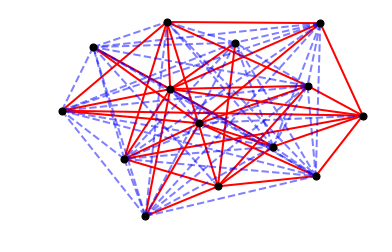

In [22]:
elarge=[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] >480]
esmall=[(u,v) for (u,v,d) in g.edges(data=True) if d['weight'] <=480]

pos=nx.spring_layout(g) # positions for all nodes

# nodes
nx.draw_networkx_nodes(g,pos,node_size=50, node_color="black")

# edges
# red -> longer than 8 minutes
# blue -> shorter than 8 minutes
nx.draw_networkx_edges(g,pos,edgelist=elarge,
                    width=2, edge_color='r')
nx.draw_networkx_edges(g,pos,edgelist=esmall,
                    width=2,alpha=0.5,edge_color='b',style='dashed')

plt.axis('off')
plt.show()

Find:
1. longest route between 2 points
2. shortest route between 2 points

In [23]:
print(nx.info(g))
print("Max weight: {}".format(narrowed_df['walking'].max()))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 80
Average degree:  11.4286
Max weight: 890.1


In [24]:
longest_edge = narrowed_df[narrowed_df['walking']==narrowed_df['walking'].max()]
longest_edge

,index,from,to,from_xy,to_xy,walking,driving,lat,long
46,46,3,8,"11.2534118, 43.7769185","11.2531435, 43.767925",890.1,1070.1,11.253412,43.776919
107,107,8,3,"11.2531435, 43.767925","11.2534118, 43.7769185",890.1,1149.6,11.253144,43.767925


In [25]:
# this is right. Bell Tower is less than 1 min away from Cathedral. Its at the same place
shortest_edge = narrowed_df[narrowed_df['walking']==narrowed_df['walking'].min()]
shortest_edge

,index,from,to,from_xy,to_xy,walking,driving,lat,long
6,6,0,7,"11.255693199999998, 43.772858299999996","11.255705099999998, 43.772806",0.0,0.0,11.255693,43.772858
91,91,7,0,"11.255705099999998, 43.772806","11.255693199999998, 43.772858299999996",0.0,0.0,11.255705,43.772806


Step 5: Calculate the minimum distance to tranverse through all nodes if network is Eulerian (even order)

In [26]:
total_weight_from_original_edges = g.size(weight='weight')
print("Total weight: {}".format(total_weight_from_original_edges))
print("Maximum number of hours for trip: {}".format(total_weight_from_original_edges/60/60))

Total weight: 37809.3
Maximum number of hours for trip: 10.502583333333336


In [27]:
# step 6: identify any nodes with odd degrees
nodes_odd_degree = [v for v, d in g.degree() if d % 2 == 1]

# Preview
nodes_odd_degree

[1, 2, 5, 6, 10, -1]

In [28]:
# Step 6.1: Compute Node Pairs
# Compute all pairs of odd nodes. in a list of tuples
# graph is undirected, so we don't care about order
odd_node_pairs = list(itertools.combinations(nodes_odd_degree, 2))

# Preview pairs of odd degree nodes
odd_node_pairs[0:10]

[(1, 2),
 (1, 5),
 (1, 6),
 (1, 10),
 (1, -1),
 (2, 5),
 (2, 6),
 (2, 10),
 (2, -1),
 (5, 6)]

In [29]:
# Count number of odd node pairs that needs to be added
print('Number of pairs: {}'.format(len(odd_node_pairs)))

Number of pairs: 15


In [30]:
# Step 6.2: Compute Shortest Paths between Node Pairs

def get_shortest_paths_distances(graph, pairs, edge_weight_name):
    """Compute shortest distance between each pair of nodes in a graph.  Return a dictionary keyed on node pairs (tuples)."""
    distances = {}
    for pair in pairs:
        path_length = nx.dijkstra_path_length(graph, pair[0], pair[1], weight=edge_weight_name)
        print("Pair {} | Path length {}".format(pair, path_length))
        distances[pair] = path_length
    return distances

# Compute shortest paths.  Return a dictionary with node pairs keys and a single value equal to shortest path distance.
odd_node_pairs_shortest_paths = get_shortest_paths_distances(g, odd_node_pairs, 'weight')

# Preview with a bit of hack (there is no head/slice method for dictionaries).
dict(list(odd_node_pairs_shortest_paths.items())[0:10])

Pair (1, 2) | Path length 418.7
Pair (1, 5) | Path length 372.8
Pair (1, 6) | Path length 104.2
Pair (1, 10) | Path length 613.5999999999999
Pair (1, -1) | Path length 402.4
Pair (2, 5) | Path length 349.4
Pair (2, 6) | Path length 323.0
Pair (2, 10) | Path length 261.2
Pair (2, -1) | Path length 30.5
Pair (5, 6) | Path length 292.3
Pair (5, 10) | Path length 364.7
Pair (5, -1) | Path length 365.3
Pair (6, 10) | Path length 509.4
Pair (6, -1) | Path length 306.7
Pair (10, -1) | Path length 291.7


{(1, 2): 418.7,
 (1, 5): 372.8,
 (1, 6): 104.2,
 (1, 10): 613.5999999999999,
 (1, -1): 402.4,
 (2, 5): 349.4,
 (2, 6): 323.0,
 (2, 10): 261.2,
 (2, -1): 30.5,
 (5, 6): 292.3}

In [31]:
# Step 2.3: Create Complete Graph
def create_complete_graph(pair_weights, flip_weights=True):
    """
    Create a completely connected graph using a list of vertex pairs and the shortest path distances between them
    Parameters: 
        pair_weights: list[tuple] from the output of get_shortest_paths_distances
        flip_weights: Boolean. Should we negate the edge attribute in pair_weights?
    """
    g = nx.Graph()
    for k, v in pair_weights.items():
        wt_i = - v if flip_weights else v
        g.add_edge(k[0], k[1], attr_dict={'distance': v, 'weight': wt_i})
    return g

# Generate the complete graph
g_odd_complete = create_complete_graph(odd_node_pairs_shortest_paths, flip_weights=True)

print(nx.info(g_odd_complete))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000


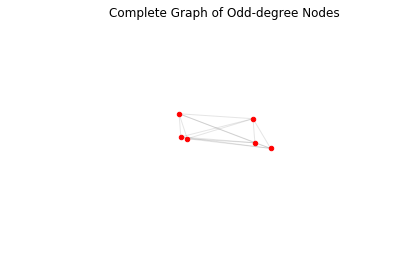

In [32]:
# Plot the complete graph of odd-degree nodes
pos_random = nx.random_layout(g_odd_complete)
nx.draw_networkx_nodes(g_odd_complete, node_positions, node_size=20, node_color="red")
nx.draw_networkx_edges(g_odd_complete, node_positions, alpha=0.1)
plt.axis('off')
plt.title('Complete Graph of Odd-degree Nodes')
plt.show()

In [33]:
# Step 6.4: Compute Minimum Weight Matching
# Compute min weight matching.
# You need to find the odd degree node pairs whose combined sum (of distance between them) is as small as possible.
# So for your problem, this boils down to selecting the optimal 18 edges (36 odd degree nodes / 2) from the hairball of a graph generated in 2.3.
# Note: max_weight_matching uses the 'weight' attribute by default as the attribute to maximize.
odd_matching_dupes = nx.algorithms.max_weight_matching(g_odd_complete, True)

print('Number of edges in matching: {}'.format(len(odd_matching_dupes)))

Number of edges in matching: 3


In [34]:
# Convert matching to list of deduped tuples
odd_matching = list(pd.unique([tuple(sorted([k, v])) for k, v in odd_matching_dupes]))

# Counts
print('Number of edges in matching (deduped): {}'.format(len(odd_matching)))

Number of edges in matching (deduped): 3


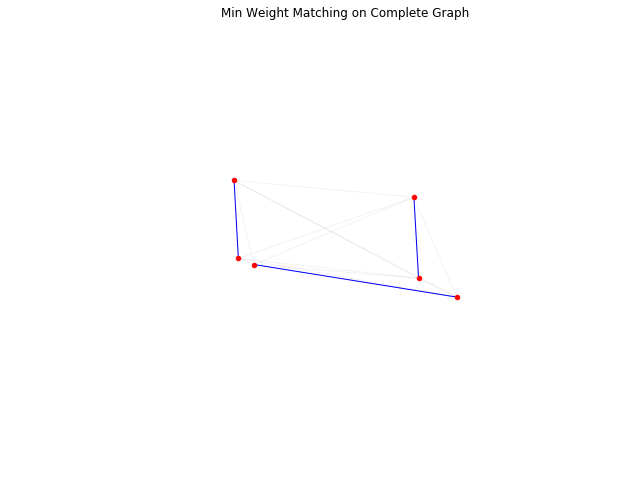

In [35]:
plt.figure(figsize=(8, 6))

# Plot the complete graph of odd-degree nodes
nx.draw(g_odd_complete, pos=node_positions, node_size=20, alpha=0.05)

# Create a new graph to overlay on g_odd_complete with just the edges from the min weight matching
g_odd_complete_min_edges = nx.Graph(odd_matching)
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, edge_color='blue', node_color='red')

plt.title('Min Weight Matching on Complete Graph')
plt.show()

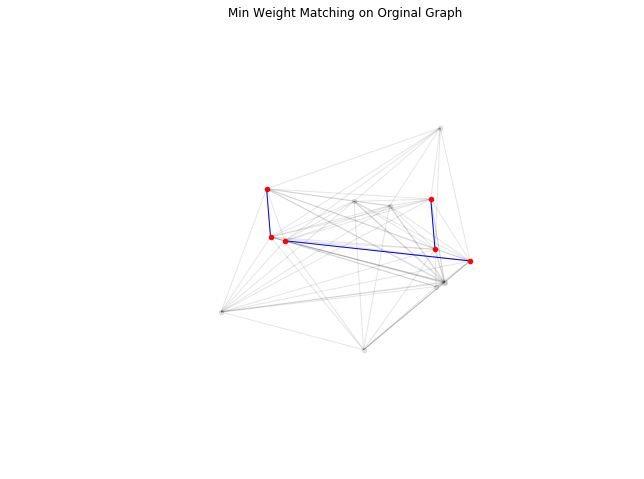

In [75]:
plt.figure(figsize=(8, 6))

# Plot the original trail map graph
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_odd_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

In [37]:
def add_augmenting_path_to_graph(graph, min_weight_pairs):
    """
    Add the min weight matching edges to the original graph
    Parameters:
        graph: NetworkX graph (original graph from trailmap)
        min_weight_pairs: list[tuples] of node pairs from min weight matching
    Returns:
        augmented NetworkX graph
    """

    # We need to make the augmented graph a MultiGraph so we can add parallel edges
    graph_aug = nx.MultiGraph(graph.copy())
    for pair in min_weight_pairs:
        path_length = nx.dijkstra_path_length(graph, pair[0], pair[1])
        print("path length between {} and {}: {}".format(pair[0], pair[1], path_length))
        graph_aug.add_edge(pair[0], 
                           pair[1], 
                           attr_dict={'walking': path_length,
                                      'path': 'augmented'}
                          )
    return graph_aug

In [38]:
# Create augmented graph: add the min weight matching edges to g
g_aug = add_augmenting_path_to_graph(g, odd_matching)

print(nx.info(g_aug))

path length between 5 and 6: 292.3
path length between -1 and 1: 402.4
path length between 2 and 10: 261.2
Name: 
Type: MultiGraph
Number of nodes: 14
Number of edges: 83
Average degree:  11.8571


In [78]:
# naive circuit
naive_euler_circuit = list(nx.eulerian_circuit(g_aug, source=-1))

In [79]:
g_aug.degree()

MultiDegreeView({0: 12, 1: 14, 2: 14, 3: 10, 5: 12, 6: 14, 7: 12, 8: 12, 9: 12, 10: 12, 11: 8, 12: 12, -1: 14, 4: 8})

In [80]:
# the length of the naive Eulerian circuit is equal to the number of the edges in the augmented graph
print('Length of eulerian circuit: {}'.format(len(naive_euler_circuit)))

Length of eulerian circuit: 83


In [81]:
# Preview naive Euler circuit
naive_euler_circuit[0:10]

[(-1, 12),
 (12, 11),
 (11, -1),
 (-1, 10),
 (10, 12),
 (12, 9),
 (9, -1),
 (-1, 8),
 (8, 12),
 (12, 7)]

In [82]:
def create_eulerian_circuit(graph_augmented, graph_original, starting_node=None):
    """Create the eulerian path using only edges from the original graph."""
    euler_circuit = []
    naive_circuit = list(nx.eulerian_circuit(graph_augmented, source=starting_node))

    for edge in naive_circuit:
        edge_data = graph_augmented.get_edge_data(edge[0], edge[1])    
        if 1 not in edge_data:
            # If `edge` exists in original graph, grab the edge attributes and add to eulerian circuit.
            edge_att = graph_original[edge[0]][edge[1]]
            euler_circuit.append((edge[0], edge[1], edge_att)) 
        else: 
            print('augment found')
            aug_path = nx.shortest_path(graph_original, edge[0], edge[1], weight='weight')
            aug_path_pairs = list(zip(aug_path[:-1], aug_path[1:]))

            print('Filling in edges for augmented edge: {}'.format(edge))
            print('Augmenting path: {}'.format(' => '.join(map(str, aug_path))))
            print('Augmenting path pairs: {}\n'.format(aug_path_pairs))

            # If `edge` does not exist in original graph, find the shortest path between its nodes and 
            #  add the edge attributes for each link in the shortest path.
            for edge_aug in aug_path_pairs:
                edge_aug_att = graph_original[edge_aug[0]][edge_aug[1]]
                euler_circuit.append((edge_aug[0], edge_aug[1], edge_aug_att))

    return euler_circuit

In [83]:
# Create the Eulerian circuit
euler_circuit = create_eulerian_circuit(g_aug, g, -1)

augment found
Filling in edges for augmented edge: (-1, 1)
Augmenting path: -1 => 1
Augmenting path pairs: [(-1, 1)]

augment found
Filling in edges for augmented edge: (1, -1)
Augmenting path: 1 => -1
Augmenting path pairs: [(1, -1)]

augment found
Filling in edges for augmented edge: (2, 10)
Augmenting path: 2 => 10
Augmenting path pairs: [(2, 10)]

augment found
Filling in edges for augmented edge: (10, 2)
Augmenting path: 10 => 2
Augmenting path pairs: [(10, 2)]

augment found
Filling in edges for augmented edge: (6, 5)
Augmenting path: 6 => 5
Augmenting path pairs: [(6, 5)]

augment found
Filling in edges for augmented edge: (5, 6)
Augmenting path: 5 => 6
Augmenting path pairs: [(5, 6)]



In [84]:
print('Length of Eulerian circuit: {}'.format(len(euler_circuit)))

Length of Eulerian circuit: 83


In [85]:
# Preview first 20 directions of CPP solution
for i, edge in enumerate(euler_circuit[0:20]):
    print(i, edge)

0 (-1, 12, {'attr_dict': {'index': 181, 'from': -1, 'to': 12, 'from_xy': '11.251184, 43.770312', 'to_xy': '11.24938, 43.77463', 'walking': 466.8, 'driving': 607.6, 'lat': 11.251184, 'long': 43.770312}, 'weight': 466.8})
1 (12, 11, {'attr_dict': {'index': 167, 'from': 12, 'to': 11, 'from_xy': '11.24938, 43.77463', 'to_xy': '11.2554649, 43.7730912', 'walking': 505.1, 'driving': 336.9, 'lat': 11.24938, 'long': 43.77463}, 'weight': 505.1})
2 (11, -1, {'attr_dict': {'index': 180, 'from': -1, 'to': 11, 'from_xy': '11.251184, 43.770312', 'to_xy': '11.2554649, 43.7730912', 'walking': 773.5, 'driving': 266.9, 'lat': 11.251184, 'long': 43.770312}, 'weight': 773.5})
3 (-1, 10, {'attr_dict': {'index': 179, 'from': -1, 'to': 10, 'from_xy': '11.251184, 43.770312', 'to_xy': '11.250670199999998, 43.767161200000004', 'walking': 291.7, 'driving': 626.1, 'lat': 11.251184, 'long': 43.770312}, 'weight': 291.7})
4 (10, 12, {'attr_dict': {'index': 166, 'from': 12, 'to': 10, 'from_xy': '11.24938, 43.77463', '

In [87]:
cpp_edgelist = create_cpp_edgelist(euler_circuit)

In [88]:
print('Number of edges in CPP edge list: {}'.format(len(cpp_edgelist)))

Number of edges in CPP edge list: 80


In [92]:
cpp_edgelist[0:3]

[(-1,
  12,
  {'attr_dict': {'index': 181,
    'from': -1,
    'to': 12,
    'from_xy': '11.251184, 43.770312',
    'to_xy': '11.24938, 43.77463',
    'walking': 466.8,
    'driving': 607.6,
    'lat': 11.251184,
    'long': 43.770312},
   'weight': 466.8,
   'sequence': '0',
   'visits': 1}),
 (12,
  11,
  {'attr_dict': {'index': 167,
    'from': 12,
    'to': 11,
    'from_xy': '11.24938, 43.77463',
    'to_xy': '11.2554649, 43.7730912',
    'walking': 505.1,
    'driving': 336.9,
    'lat': 11.24938,
    'long': 43.77463},
   'weight': 505.1,
   'sequence': '1',
   'visits': 1}),
 (11,
  -1,
  {'attr_dict': {'index': 180,
    'from': -1,
    'to': 11,
    'from_xy': '11.251184, 43.770312',
    'to_xy': '11.2554649, 43.7730912',
    'walking': 773.5,
    'driving': 266.9,
    'lat': 11.251184,
    'long': 43.770312},
   'weight': 773.5,
   'sequence': '2',
   'visits': 1})]

In [89]:
# Create CPP solution graph
g_cpp = nx.Graph(cpp_edgelist)

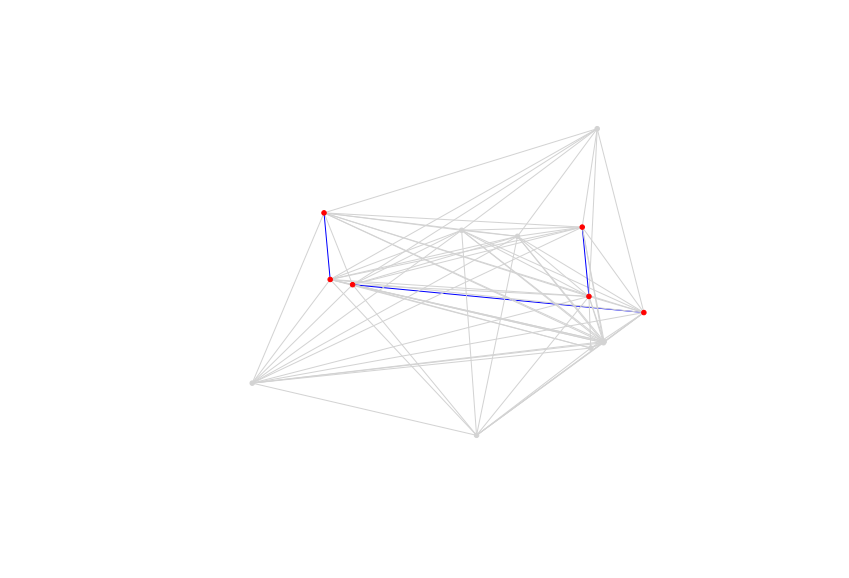

In [99]:
plt.figure(figsize=(14, 10))

visit_colors = {1:'lightgray', 2:'blue'}
edge_colors = [visit_colors[e[2]['visits']] for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()

In [101]:
# get shortest path and distance for each pair of vertices
length_dict=dict(nx.all_pairs_dijkstra_path_length(g))
path_dict=dict(nx.all_pairs_dijkstra_path(g))

In [102]:
start_point = -1
current_point = start_point
pending_visit = list(length_dict.keys())
visited = [start_point]
total_distance = 0

In [105]:
while len(pending_visit)>1:
    print(visited)
    current_point_lengths = length_dict[current_point]
    del current_point_lengths[current_point]
    print(current_point_lengths)
    for node, dist in current_point_lengths.items():
        if node not in visited:
            print("node {} not visited before".format(node))
            current_point = node
            visited.append(current_point)
            pending_visit.remove(current_point)
            total_distance+=dist
            break
print("remaining unvisited: {}".format(pending_visit))
visit_path = [path_dict[v][visited[e+1]] for e, v in enumerate(visited[:-1])]

# last route back to start point
visit_path.append(nx.dijkstra_path(g, visited[-1], start_point))
total_distance += nx.dijkstra_path_length(g, visited[-1], start_point)

visit_path, visited, total_distance/60/60

remaining unvisited: [-1]


([[-1, 2],
  [2, 10],
  [10, 8],
  [8, 9],
  [9, 5],
  [5, 6],
  [6, 1],
  [1, 0],
  [0, 7],
  [7, 12],
  [12, 3],
  [3, 11],
  [11, 6, 4],
  [4, -1]],
 [-1, 2, 10, 8, 9, 5, 6, 1, 0, 7, 12, 3, 11, 4],
 1.5301111111111112)

In [107]:
flat_list = [item for sublist in visit_path for item in sublist]
from collections import Counter
Counter(flat_list)

Counter({-1: 2,
         2: 2,
         10: 2,
         8: 2,
         9: 2,
         5: 2,
         6: 3,
         1: 2,
         0: 2,
         7: 2,
         12: 2,
         3: 2,
         11: 2,
         4: 2})

In [108]:
df

,index,name,lat,long,hours
0,0,Cathedral of Santa Maria del Fiore,43.772858,11.255693,1.00
1,1,Chiaroscuro,43.771534,11.256419,0.50
2,2,Holy Trinity,43.770083,11.250781,0.50
3,3,Mercato di San Lorenzo,43.776919,11.253412,1.00
4,4,Villa Bardini,43.763469,11.255580,1.50
5,5,Uffizi Gallery,43.767786,11.255311,0.50
6,6,Perch̩ no!...,43.770828,11.255432,0.50
7,7,Giotto's Bell Tower,43.772806,11.255705,0.75
8,8,Ponte Vecchio,43.767925,11.253144,0.20
9,9,Corridoio Vasariano,43.768191,11.254148,0.50


In [51]:
def get_hamiltonian_path(edge_df, node_df):
    dG = nx.DiGraph()
    edge_col = edge_df.columns
    node_col = node_df.columns
    # Add edges and edge attributes
    for i, elrow in edge_df.iterrows():
        edge_dict = dict(zip(edge_col, elrow))
        dG.add_edge(edge_dict['from'], edge_dict['to'], attr_dict=edge_dict, weight=edge_dict["walking"])
    for i, nlrow in node_df.iterrows():
        node_dict = dict(zip(node_col, nlrow))
        dG.node[node_dict['index']].update(node_dict)
    return nx.tournament.hamiltonian_path(dG)

[-1, 3, 0, 4, 12, 10, 9, 8, 5, 11, 7, 6, 2, 1]

In [104]:
# Generate the complete graph
g_all_complete = create_complete_graph(node_pairs_shortest_paths, flip_weights=True)

print(nx.info(g_all_complete))

all_matching_dupes = nx.algorithms.max_weight_matching(g_all_complete, True)

print('Number of edges in matching: {}'.format(len(all_matching_dupes)))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 91
Average degree:  13.0000
Number of edges in matching: 7


In [105]:
# Convert matching to list of deduped tuples
matching = list(pd.unique([tuple(sorted([k, v])) for k, v in all_matching_dupes]))

# Counts
print('Number of edges in matching (deduped): {}'.format(len(matching)))

Number of edges in matching (deduped): 7


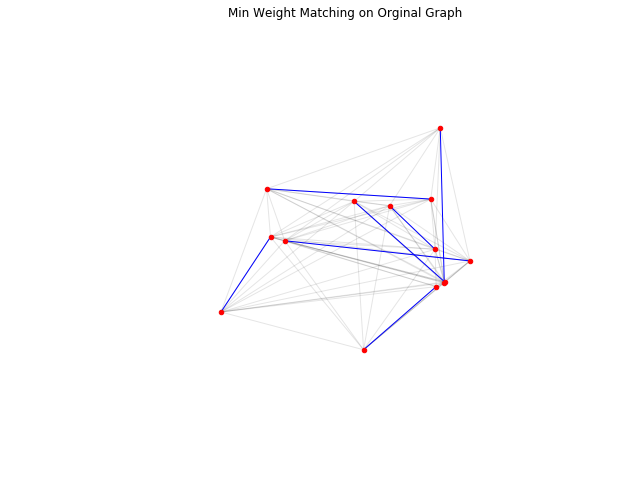

In [106]:
plt.figure(figsize=(8, 6))

# Plot the original trail map graph
nx.draw(g, pos=node_positions, node_size=20, alpha=0.1, node_color='black')

g_all_complete_min_edges = nx.Graph(matching)

# Plot graph to overlay with just the edges from the min weight matching
nx.draw(g_all_complete_min_edges, pos=node_positions, node_size=20, alpha=1, node_color='red', edge_color='blue')

plt.title('Min Weight Matching on Orginal Graph')
plt.show()

In [133]:
print(nx.info(g_all_complete_min_edges))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 7
Average degree:   1.0000


In [139]:
print(nx.info(g_odd_complete_min_edges))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 3
Average degree:   1.0000


In [153]:
new_aug = add_augmenting_path_to_graph(g_all_complete_min_edges, odd_matching)
print(nx.info(new_aug))

Name: 
Type: MultiGraph
Number of nodes: 14
Number of edges: 12
Average degree:   1.7143


In [159]:
[v for v, d in g_all_complete_min_edges.degree() if d % 2 == 1]

[3, 11, 1, -1, 8, 7, 12, 0, 4, 9]

In [149]:
# Generate the complete graph
g_all_complete = create_complete_graph(node_pairs_shortest_paths, flip_weights=True)

print(nx.info(g_all_complete))

all_matching_dupes = nx.algorithms.max_weight_matching(g_all_complete, True)

print('Number of edges in matching: {}'.format(len(all_matching_dupes)))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 97
Average degree:  13.8571
Number of edges in matching: 7


In [154]:
# naive circuit
naive_euler_circuit = list(nx.eulerian_circuit(new_aug, source=-1))

NetworkXError: G is not Eulerian.

In [138]:
# Create the Eulerian circuit
euler_circuit_all = create_eulerian_circuit(g_odd_complete_min_edges, g_all_complete_min_edges, -1)

NetworkXError: G is not Eulerian.

In [115]:
# Preview first 20 directions of CPP solution
for i, edge in enumerate(euler_circuit_all[0:20]):
    print(i, edge)

0 (-1, 12, AtlasView({0: {'attr_dict': {'index': 181, 'from': -1, 'to': 12, 'from_xy': '11.251184, 43.770312', 'to_xy': '11.24938, 43.77463', 'walking': 466.8, 'driving': 607.6, 'lat': 11.251184, 'long': 43.770312}, 'weight': 466.8, 'sequence': '0', 'visits': 1}}))
1 (12, 11, AtlasView({0: {'attr_dict': {'index': 167, 'from': 12, 'to': 11, 'from_xy': '11.24938, 43.77463', 'to_xy': '11.2554649, 43.7730912', 'walking': 505.1, 'driving': 336.9, 'lat': 11.24938, 'long': 43.77463}, 'weight': 505.1, 'sequence': '1', 'visits': 1}}))
2 (11, -1, AtlasView({0: {'attr_dict': {'index': 180, 'from': -1, 'to': 11, 'from_xy': '11.251184, 43.770312', 'to_xy': '11.2554649, 43.7730912', 'walking': 773.5, 'driving': 266.9, 'lat': 11.251184, 'long': 43.770312}, 'weight': 773.5, 'sequence': '2', 'visits': 1}}))
3 (-1, 10, AtlasView({0: {'attr_dict': {'index': 179, 'from': -1, 'to': 10, 'from_xy': '11.251184, 43.770312', 'to_xy': '11.250670199999998, 43.767161200000004', 'walking': 291.7, 'driving': 626.1, 

In [128]:
def create_cpp_edgelist(euler_circuit):
    """
    Create the edgelist without parallel edge for the visualization
    Combine duplicate edges and keep track of their sequence and # of walks
    Parameters:
        euler_circuit: list[tuple] from create_eulerian_circuit
    """
    cpp_edgelist = {}

    for i, e in enumerate(euler_circuit):
        edge = frozenset([e[0], e[1]])

        if edge in cpp_edgelist:
            cpp_edgelist[edge][2]['sequence'] += ', ' + str(i)
            cpp_edgelist[edge][2]['visits'] += 1

        else:
            if isinstance(e[2], nx.classes.coreviews.AtlasView):
                edge_item = (e[0], e[1], e[2][0])
            else:
                edge_item = e
            cpp_edgelist[edge] = edge_item
            cpp_edgelist[edge][2]['sequence'] = str(i)
            cpp_edgelist[edge][2]['visits'] = 1

    return list(cpp_edgelist.values())

In [129]:
cpp_edgelist = create_cpp_edgelist(euler_circuit_all)
print(len(cpp_edgelist))

78


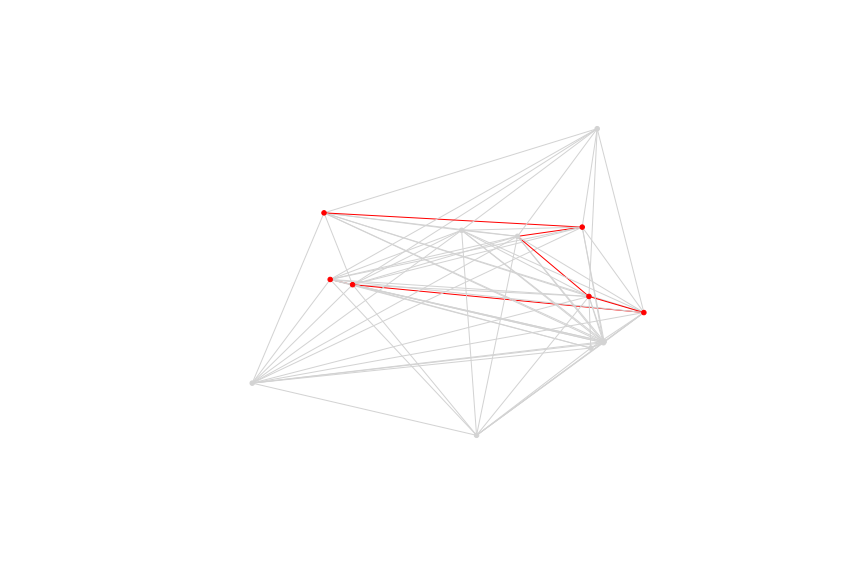

In [131]:
# Create CPP solution graph
g_cpp = nx.Graph(cpp_edgelist)
plt.figure(figsize=(14, 10))

visit_colors = {1:'lightgray', 2:'blue'}
edge_colors = [visit_colors[e[2]['visits']] if e[2]['visits'] in visit_colors else "red" for e in g_cpp.edges(data=True)]
node_colors = ['red'  if node in nodes_odd_degree else 'lightgray' for node in g_cpp.nodes()]

nx.draw_networkx(g_cpp, pos=node_positions, node_size=20, node_color=node_colors, edge_color=edge_colors, with_labels=False)
plt.axis('off')
plt.show()